<a href="https://colab.research.google.com/github/VictorOPreuss/aceleradev_ds/blob/master/desafios/Desafio%208/desafio_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#uploaded = files.upload()

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ = pd.read_csv('test.csv')

In [0]:
cols = list(test.columns)
cols.append('IN_TREINEIRO')
train = train[cols]
#train = train.select_dtypes(exclude=['object'])
#test = test.select_dtypes(exclude=['object'])

In [5]:
train.sample(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
10179,0c925a90d75c8b11f520bccff9998398aa149bf7,41,PR,19,M,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,C,A,A,B,F,A,0
13039,4eef0e7cf4d0ce40af64154e1ccb357c6892034a,41,PR,19,F,1,1,1,2,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,D,C,A,B,B,E,A,0
10891,5691bff7f9a49b5cc31405ce3c233e41da79467d,23,CE,16,F,3,1,3,0,1,NaN,NaN,0,0,0,0,0,1,0,0,1,1,1,1,450.5,601.4,577.6,0,1.0,140.0,140.0,120.0,140.0,100.0,640.0,E,D,C,A,A,A,NaN,A,1
9402,9a7085c839bdc17620ae37f4c15334fcd3dc6e74,15,PA,27,F,3,1,1,9,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,519.9,468.4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,C,A,B,B,F,A,0
12130,d0140eda5e7dd120a67c8c42d6b94fa6355b15f3,23,CE,16,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,559.0,646.7,603.4,0,1.0,120.0,120.0,120.0,120.0,120.0,600.0,F,G,D,B,B,A,NaN,D,1
12028,4148a6d3614c1cdb24046ef6d38e21abffc15766,25,PB,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,518.3,621.3,543.8,0,1.0,120.0,120.0,80.0,120.0,120.0,560.0,B,D,B,B,B,A,NaN,A,0
559,708a70e679ba33319063ce555e7f487e4a7d9b94,31,MG,16,F,4,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,446.0,471.5,454.2,0,1.0,120.0,40.0,60.0,100.0,40.0,360.0,E,C,B,A,A,B,B,A,1
5324,641aa9db5e70cc434e7f32ffd3425a11dc54c557,26,PE,17,M,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,412.4,475.9,479.6,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,G,B,B,A,A,A,NaN,A,0
10075,8e0884fb86ea949a53e798ea5a25487fd9cb0a82,31,MG,37,F,2,1,1,10,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,D,C,B,B,B,M,A,0
5589,0f9c88d8ac8f893b8354fe51771c6cf05116ed20,41,PR,26,M,3,2,4,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,384.5,420.7,386.4,1,1.0,80.0,80.0,60.0,40.0,40.0,300.0,B,H,C,B,B,B,E,A,0


In [6]:
test.sample(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
3663,58d9e88a96932d599008e2526b61938308fa91a1,23,CE,20,M,3,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,461.2,557.5,545.4,1,1.0,120.0,80.0,100.0,120.0,80.0,500.0,E,E,C,B,B,A,NaN,A
1504,b7c0ab9c46eed8ee8ad34d69b06c5c440ff5fdcf,43,RS,23,F,1,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,E,A,A,B,D,A
2374,a62db45075285d6b49fa2da94accc8548de794d6,23,CE,25,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,A,NaN,A
338,92c3dc993f035d74711832125d1c573ec5a6d6d9,35,SP,17,M,2,2,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,497.0,532.0,476.8,1,1.0,140.0,120.0,80.0,80.0,40.0,460.0,C,C,C,B,B,A,NaN,A
3883,cb7f61a821eafe55baff0c3ea743c0917fa1c48d,29,BA,18,F,3,2,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,508.4,516.6,413.3,1,1.0,100.0,80.0,100.0,80.0,40.0,400.0,E,C,E,B,B,A,NaN,A
3226,840385db18f44dd6329402e8b01fc632d890dd98,31,MG,22,F,2,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,445.6,547.0,435.7,0,1.0,120.0,100.0,120.0,100.0,80.0,520.0,D,E,D,B,B,C,NaN,A
4282,73174e136974d1e6b1c6b1ea83c0a397a998df38,24,RN,26,M,3,1,1,9,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,C,B,B,A,NaN,D
3234,82df9cc8146649946779c2d1861c9bfeab1364cf,15,PA,23,F,3,1,1,5,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,386.2,458.6,413.5,1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,B,B,B,A,A,A,NaN,A
1546,bea7e9119bcaa0cf4886228b238fe532cd3db365,41,PR,18,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,387.4,494.6,524.6,1,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,C,F,C,B,A,NaN,A
1021,84752c2780f86a4fe0c591e5092a398c4771bc52,33,RJ,17,M,0,1,2,0,2,1.0,3.0,0,0,0,0,0,0,0,0,1,1,1,1,476.5,502.3,416.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,H,H,B,A,A,A,NaN,A


In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            13730 non-null  object 
 1   CO_UF_RESIDENCIA        13730 non-null  int64  
 2   SG_UF_RESIDENCIA        13730 non-null  object 
 3   NU_IDADE                13730 non-null  int64  
 4   TP_SEXO                 13730 non-null  object 
 5   TP_COR_RACA             13730 non-null  int64  
 6   TP_NACIONALIDADE        13730 non-null  int64  
 7   TP_ST_CONCLUSAO         13730 non-null  int64  
 8   TP_ANO_CONCLUIU         13730 non-null  int64  
 9   TP_ESCOLA               13730 non-null  int64  
 10  TP_ENSINO               4282 non-null   float64
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA             13730 non-null  int64  
 14  IN_SURDEZ               13730 non-null

In [0]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [9]:
missing_percentage(train)

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,9448,68.81
TP_ENSINO,9448,68.81
Q027,7373,53.70
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP1,3597,26.20
NU_NOTA_LC,3597,26.20
NU_NOTA_REDACAO,3597,26.20
NU_NOTA_COMP5,3597,26.20


In [10]:
missing_percentage(test)

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,3144,68.80
TP_ENSINO,3144,68.80
Q027,2437,53.33
NU_NOTA_COMP1,1170,25.60
NU_NOTA_COMP5,1170,25.60
TP_STATUS_REDACAO,1170,25.60
NU_NOTA_COMP2,1170,25.60
NU_NOTA_COMP3,1170,25.60
NU_NOTA_COMP4,1170,25.60
NU_NOTA_REDACAO,1170,25.60


In [0]:
# Function to keep columns with < X% missing values

def drop_features(DF, percentage_missing_values): # keep columns with % of missing values < percentage_missing_values

  df_droped = DF[DF.columns[DF.isnull().mean() <= (percentage_missing_values/100)]]
  
  return df_droped

In [0]:
train_0 = drop_features(train, 0)
test_0 = drop_features(test, 0)

In [13]:
train_0.info()
test_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NU_INSCRICAO      13730 non-null  object
 1   CO_UF_RESIDENCIA  13730 non-null  int64 
 2   SG_UF_RESIDENCIA  13730 non-null  object
 3   NU_IDADE          13730 non-null  int64 
 4   TP_SEXO           13730 non-null  object
 5   TP_COR_RACA       13730 non-null  int64 
 6   TP_NACIONALIDADE  13730 non-null  int64 
 7   TP_ST_CONCLUSAO   13730 non-null  int64 
 8   TP_ANO_CONCLUIU   13730 non-null  int64 
 9   TP_ESCOLA         13730 non-null  int64 
 10  IN_BAIXA_VISAO    13730 non-null  int64 
 11  IN_CEGUEIRA       13730 non-null  int64 
 12  IN_SURDEZ         13730 non-null  int64 
 13  IN_DISLEXIA       13730 non-null  int64 
 14  IN_DISCALCULIA    13730 non-null  int64 
 15  IN_SABATISTA      13730 non-null  int64 
 16  IN_GESTANTE       13730 non-null  int64 
 17  IN_IDOSO    

In [14]:
# Number of unique classes in each DTYPE column

train_0.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NU_INSCRICAO        13730
SG_UF_RESIDENCIA       27
TP_SEXO                 2
Q001                    8
Q002                    8
Q006                   17
Q024                    5
Q025                    2
Q026                    3
Q047                    5
dtype: int64

In [0]:
train_0 = train_0.select_dtypes(exclude=['object'])
test_0 = test_0.select_dtypes(exclude=['object'])

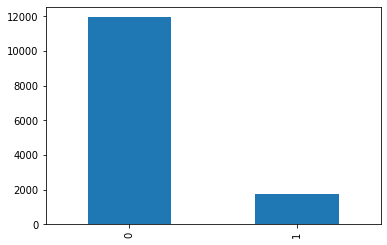

In [16]:
train_0['IN_TREINEIRO'].value_counts().plot(kind='bar')

In [0]:
train_0['IN_TREINEIRO'] = train_0['IN_TREINEIRO'].astype(bool)

In [0]:
# Labels are the values we want to predict
train_0_label = np.array(train_0['IN_TREINEIRO'])
# Remove the labels from the features
# axis 1 refers to the columns
train_0_features = train_0.drop('IN_TREINEIRO', axis = 1)
# Convert to numpy array
train_0_features = np.array(train_0_features)

In [0]:
scaler = StandardScaler()
train_0_features_sc = scaler.fit_transform(train_0_features)
test_0_sc = scaler.transform(test_0)

In [0]:
pca = PCA(0.95)

pca.fit(train_0_features_sc)

train_0_features_sc_pca = pca.transform(train_0_features_sc)

In [0]:
test_0_sc_pca = pca.transform(test_0_sc)

In [0]:
smote = SMOTE(ratio="minority")

X_smote, y_smote = smote.fit_resample(train_0_features_sc, train_0_label)

In [0]:
train_0_features_sc_pca_smote = pca.transform(X_smote)

In [27]:
sum(y_smote == True)/sum(y_smote == False)

1.0

In [28]:
train_0_features_sc_pca_smote

array([[-0.67806244,  1.43855808,  1.33825549, ..., -0.12127972,
        -0.01082494,  0.55438919],
       [-1.53718405, -0.61015474, -1.37566557, ..., -0.9013252 ,
         0.08678757, -0.21112469],
       [ 3.04118767, -1.85071043, -1.59856362, ...,  0.80218332,
        -0.24324666, -0.10048687],
       ...,
       [ 2.75838031, -2.58187019,  1.2104453 , ...,  1.13810986,
        -0.75274867,  0.47260754],
       [-1.43512261, -0.804596  , -0.1086781 , ...,  1.61911776,
         0.66338402,  0.0372697 ],
       [-1.51229851, -0.84882604,  0.53240128, ...,  1.39123381,
        -1.44666528,  0.03639888]])

In [29]:
pca.explained_variance_ratio_

array([0.21968148, 0.10629514, 0.06887948, 0.05392029, 0.05347445,
       0.05299415, 0.05285541, 0.05264065, 0.05256288, 0.05234493,
       0.05137729, 0.0481542 , 0.04359469, 0.03988311, 0.03509907])

In [0]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(train_0_features_sc_pca_smote, y_smote, test_size = 0.25, random_state = 42)

In [31]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (17920, 15)
Training Labels Shape: (17920,)
Testing Features Shape: (5974, 15)
Testing Labels Shape: (5974,)


In [32]:
regr = RandomForestClassifier(random_state=0, n_estimators=150)
regr.fit(X_train, Y_train)
print(regr.predict(X_test))

[ True False False ...  True  True  True]


In [33]:
regr.score(X_test,Y_test)

0.9953130231001004

In [0]:
predictions = regr.predict(test_0_sc_pca)

In [0]:
df = pd.DataFrame(data=predictions.flatten(), columns=['IN_TREINEIRO'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   IN_TREINEIRO  4570 non-null   bool 
dtypes: bool(1)
memory usage: 4.6 KB


In [0]:
testsupreme = pd.concat([test_.NU_INSCRICAO, df], axis=1)

In [44]:
testsupreme

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,False
1,177f281c68fa032aedbd842a745da68490926cd2,False
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,True
3,5c356d810fa57671402502cd0933e5601a2ebf1e,False
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,False
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,False
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,False
4567,3f1c3388244df8d6521e983a809292d9f3bca643,False
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,False


In [0]:
from google.colab import files
testsupreme.to_csv('answer.csv', index = False)